# TP 9: Problème d'obstacle

## 1. Formulation par éléments finis ## 

$$
\newcommand{\sca}[2]{\langle #1\mid #2 \rangle}
\newcommand{\nr}[1]{\left\|#1\right\|}
\newcommand{\LL}{\mathrm{L}} 
\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\Psp}{\mathbb{P}}
\newcommand{\Class}{\mathcal{C}}
$$
Soit $\Omega$ un ouvert de $\Rsp^2$ et $\Psi\in H^1_0(\Omega) \cap \Class^\infty(\Omega)$. On s'intéresse à la résolution du problème d'obstacle:
$$
\min_{v\in C} \int_\Omega \nr{\nabla v}^2
$$
où $C = \{ u\in H^1_0(\Omega) \mid u \geq \Psi\}$.
On discrétise ce problème par la méthode des éléments finis en 2D. On part d'une triangulation $T_h$ de l'ouvert $\Omega$, et on note:
* $V_h$ l'espace des éléments finis $\Psp_1$ sur $T_h$, de sorte que $V_h\subseteq V := H^1(\Omega)$;
* $N_h :=\dim(V_h) = N_h$;
* $x_1,\dots,x_{N_h}$ les sommets de la triangulation. On suppose que les sommets du bord sont numérotés $J_h \subseteq \{ 1,\dots, N_h \}.$
* $V_{0h} = \{ v\in V_h\mid \forall k\in J_h, v(x_k) = 0 \}$
* $C_h = \{ v\in V_{0h}\mid \forall 1\leq i\leq N_h,~~ v(x_i) \geq \Psi(x_i) \}$

Le problème discret est alors donné par 
$$
\min_{v\in C_h} \int_\Omega \nr{\nabla v}^2.
$$

**Q1.** On note $W = (v_1,\dots,v_{N_h}) \in \Rsp^{N_h}$ les valeurs d'une fonction $v\in V_h$ sur les sommets $x_1,\dots,x_{N_h}$ (i.e. $v = \sum_{1\leq i\leq N_h} v_i \phi_i$ où $\phi_i$ est la base de $V_h$ formée des fonctions chapeau). Montrer que le problème peut être mis sous la forme

$$ \min_{W\in D_h} W^T  A W $$
$$D_h = \{ W\in \Rsp^{N_h} \mid \forall 1\leq i\leq N_h, W_i \geq \Psi(x_i) \hbox{ et } \forall k\in J_h,~ W_k = 0\}$$

*(Indication: on se rappellera de la caractérisation de la projection sur un convexe fermé)*

**Q2.** Soit $W\in \Rsp^{N_h}$. Montrer que la projection orthogonale de $W$ sur $D_h$ est donnée par

$$ \Pi_{D_h}(W) = \begin{cases} \max(W_i,\Psi(x_i)) & \hbox{ si } i\not\in J_h \\
0 & \hbox{ sinon } 
\end{cases}. $$

**Q3.** Écrire explicitement l'algorithme de gradient projeté (à pas constant) dans le cas où $J(W) = W^T A W$ et $K =  D_h$. Expliciter la condition nécessaire sur le pas de descente en fonction des valeurs propres de la matrice $A$.

<!---
[comment]: <> **Q4.** On s'intéresse au gradient projeté à pas optimal. On rappelle que l'algorithme de descente de gradient
[comment]: <> à pas optimal pour la minimisation (sans contrainte) de $W  \mapsto W^T A W$ est donné par $W^0 \in \Rsp^{N_h}$
[comment]: <> et $W^{k+1} = F(W)$ où $$ F(W) = W - 
--->

**Q4.** Implémenter cet algorithme dans le cas du disque $\Omega = \{ x^2 + y^2 \leq 4 \}$, en utilisant

$$ \Psi(x,y) = \begin{cases} \sqrt{1 - x^2 - y^2}, &\hbox{ si } x^2 + y^2 < 1 \\
0 &\hbox{ sinon } \end{cases} $$ 

Utiliser les fonction fournies pour trianguler le disque et calculer la matrice de rigidité. On pourra utiliser np.where pour construire la liste des indices des poins du bord.


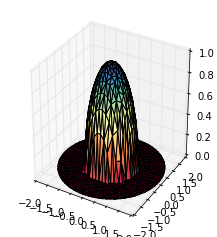

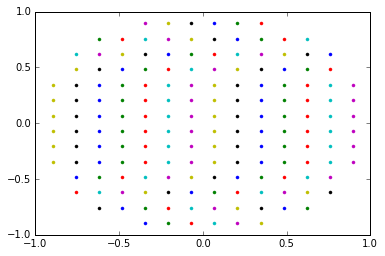

0.0
0.993867846551


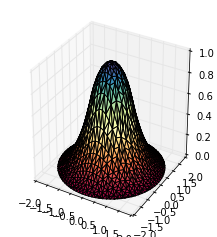

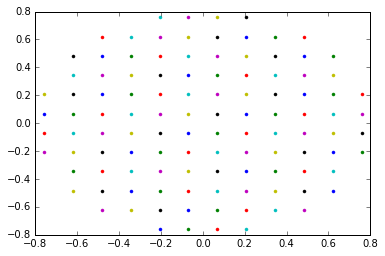

0.16076803895
0.0


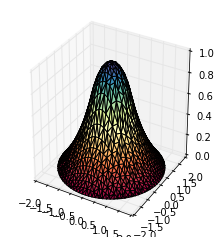

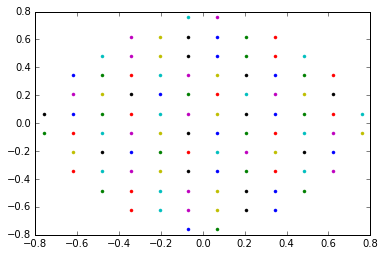

0.0510752537086
0.0


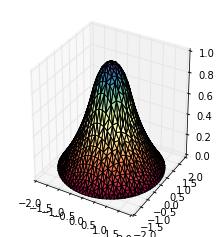

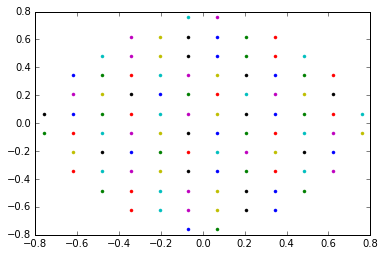

0.016835006485
0.00024561994972


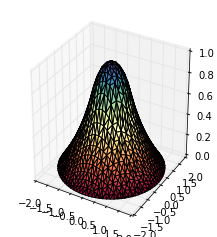

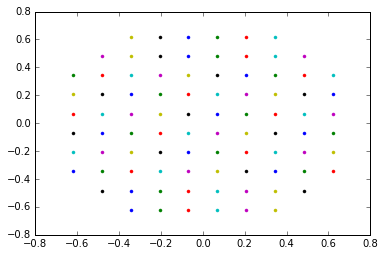

0.00594289791937
0.0


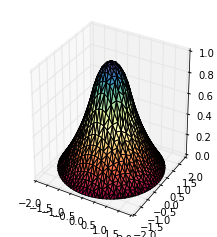

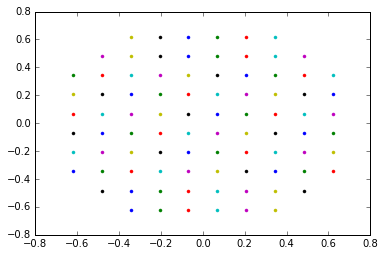

0.0021053087869
0.0


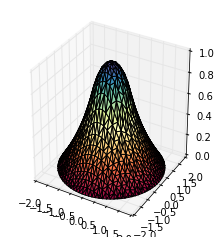

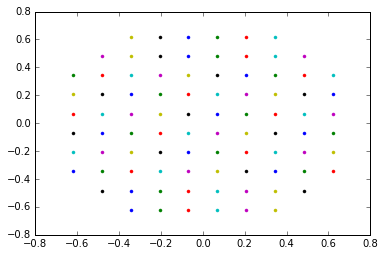

0.000745831249826
0.0


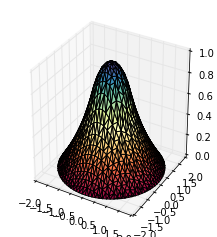

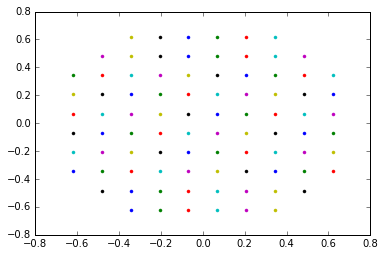

0.000264219913624
0.0


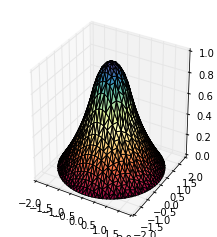

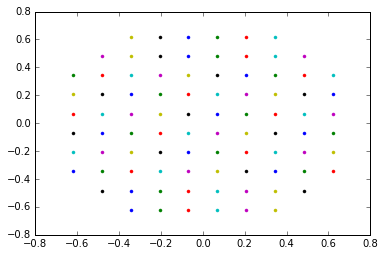

9.36031625799e-05
0.0


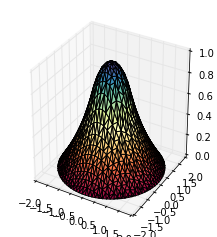

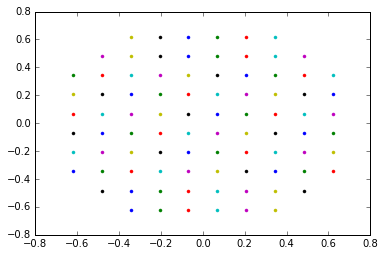

3.31600746083e-05
0.0


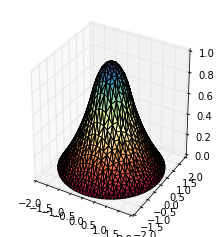

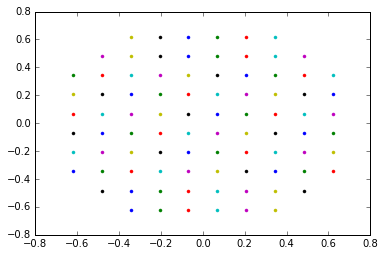

1.17473653425e-05
0.0
[ -5.98502978e-18]


ArpackNoConvergence: ARPACK error -1: No convergence (7421 iterations, 0/1 eigenvectors converged)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as splinalg

def triangulation_disque(n):
    h = 2.0/n
    x,y = np.meshgrid(np.linspace(-2.,2.,n),
                      np.linspace(-2.,2.,n))
    x = x.reshape(n*n,1)
    y = y.reshape(n*n,1)
    X = np.hstack((x,y))
    J = np.where(X[:,0] * X[:,0] + X[:,1] * X[:,1] <= 4.0 - h)[0]
    X = X[J,:]
    t = np.linspace(0,2*np.pi-h, 2*np.pi/h)
    Y = np.vstack((2*np.cos(t), 2*np.sin(t))).T
    X = np.vstack((X,Y))
    T = tri.Triangulation(X[:,0], X[:,1]).triangles
    return X,T

# calcule la normale d'une famille de triangles triangle 3D, en déduit le gradient des fonctions dont 
# les triangles sont le graphe
def tri_gradient(A,B,C):
    N = np.cross(B - A, C-B)
    Gx = -N[:,0] / N[:,2]
    Gy = -N[:,1] / N[:,2]
    return Gx, Gy

def matrice_rigidite(X,T):
    nt = T.shape[0];
    npts = X.shape[0];
  
    A = X[T[:,0],:]; # liste des points A des triangles
    B = X[T[:,1],:]; # liste des points B des triangles
    C = X[T[:,2],:]; # liste des points C des triangles
  
    # calcul de dx et dy sur chaque triangle, en fonction de la valeur de
    # la fonction aux sommets du triangle
    Z = np.zeros((nt,1));
    I = np.ones((nt,1));
    [Gx1,Gy1] = tri_gradient(np.hstack((A,I)),np.hstack((B,Z)),np.hstack((C,Z)));
    [Gx2,Gy2] = tri_gradient(np.hstack((A,Z)),np.hstack((B,I)),np.hstack((C,Z)));
    [Gx3,Gy3] = tri_gradient(np.hstack((A,Z)),np.hstack((B,Z)),np.hstack((C,I)));
  
    # assemblage des matrices creuses
    # pour chaque triangle 1\leq t \leq nt, on a trois coefficients non nuls
    # en (t,a), (t,b), (t,c) où a = T[i,1], b=T[i,2], c=T[i,3]
    I = np.hstack((np.arange(nt), np.arange(nt), np.arange(nt)))
    J = np.hstack((T[:,0], T[:,1], T[:,2]))
    Sx = np.hstack((Gx1,Gx2,Gx3))
    Sy = np.hstack((Gy1,Gy2,Gy3))
    
    # les matrices creuses sont construites de la manière suivante:
    # pour tout l dans 0, ..., len(J)-1, on pose dx[I[k],J[k]] = Sx[k]
    dx = sp.csc_matrix((Sx,(I,J)),shape=(nt,npts))
    dy = sp.csc_matrix((Sy,(I,J)),shape=(nt,npts))
    
    # calcul de l'aire des triangles:
    AB = B-A
    BC = C-B
    aires = .5*(AB[:,0]*BC[:,1] - AB[:,1]*BC[:,0])
    
    return dx.T*sp.diags(aires)*dx + dy.T*sp.diags(aires)*dy

[X,T] = triangulation_disque(30)
A = matrice_rigidite(X,T)
J = np.where(X[:,0] * X[:,0] + X[:,1] * X[:,1] >= 4 - 1e-2)
N = len(X)

Psi = np.sqrt(np.maximum(0.0, 1.0 - X[:,0]*X[:,0] - X[:,1]*X[:,1]))

from mpl_toolkits.mplot3d import Axes3D

tau = 1e-1
v = np.zeros(N)
for i in xrange(1001):
    v = v - tau * (A*v)
    v = np.maximum(v, Psi)
    v[J] = 0
    if i%100==0:
        #plt.tripcolor(X[:,0],X[:,1],T,v,shading='gouraud')
        fig = plt.figure(figsize=plt.figaspect(0.5))
        ax = fig.add_subplot(1, 2, 1, projection='3d',)
        ax.plot_trisurf(X[:,0],X[:,1],v,triangles=T, cmap=plt.cm.Spectral, shade=True)
        plt.show()
        Iactive = np.where(np.logical_and(v <= Psi, v > 0))
        Iinactive = np.where(v > Psi)
        plt.plot(X[Iactive,0],X[Iactive,1],'.')
        plt.show()
        print np.linalg.norm((A * v)[Iinactive])
        print np.sum(np.maximum(-(A * v)[Iactive], 0.0))
        
A = sp.csc_matrix(A)
print splinalg.eigsh(A,k=1,sigma=0)[0] # plus petite vp
print splinalg.eigsh(A,k=1)[0] # plus grande vp


**Q5.** On admet que si $u \in \Class^1(\bar{\Omega}) \cap H^2_0(\bar{\Omega})$ vérifie 
$$ \begin{cases}
- \Delta u = 0 &\hbox{ si } u > \Psi \\
- \Delta u \geq 0 &\hbox{ quand } u = \Psi 
\end{cases},$$
alors $u$ est solution du problème d'obstacle. La difficulté principale est de trouver l'ensemble de contact $\{ x \in \Omega \mid u(x)=\Psi(x)\}$. En posant $u(x,y) = f(r)$ (en  coordonnées polaires) avec $f: [0,2]\to\Rsp$, montrer qu'il existe une solution vérifiant ces hypothèses.

*(Indication: supposer que $u = \Psi$ sur $B(0,a)$ et $\Delta u = 0$ sur $B(0,2)\setminus B(0,a)$, et trouver $a \in (0,2)$ tel que les conditions de Dirichlet soient vérifiées.)*

**Q6.** Vérifier numériquement que l'on retrouve la bonne valeur de $a$.

**Q7.** Démontrer que $U$ est optimal pour le problème discret ($\min_{W\in K_h} W^T A W$) si et seulement si il vérifie les conditions suivantes, appellées conditions de *Karush-Kuhn-Tucker* (KKT):

$$ \begin{cases}
U_i = 0 & \hbox{ si } i \in J_h \hbox{ (bord) } \\
- A U_i \geq 0 & \hbox{ si } U_i = \Psi_i \\
- A U_i = 0 & \hbox{ si } U_i > \Psi_i 
\end{cases} $$

*(Indication: le sens direct (optimalite $\Longrightarrow$ KKT) se démontre comme dans le cours. Pour la réciproque, il faut se rappeler que, si $J(W) = W^T A W$, alors par convexité, $J(W) \geq J(U) + \sca{\nabla J(U)}{W - U}$ pour tout $W\in \Rsp^{N_h}$)*

**Q8.** En déduire un critère permettant de vérifier la convergence de l'algorithme du gradient projeté. Estimer (numériquement) la vitesse de convergence de l'algorithme en fonction du nombre d'itérations ($h$ restant fixé).


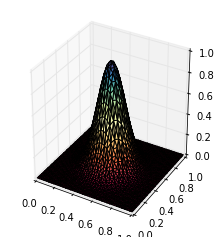

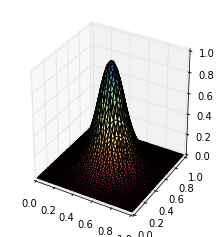

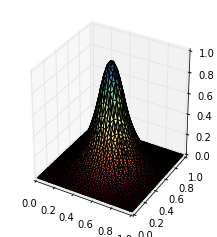

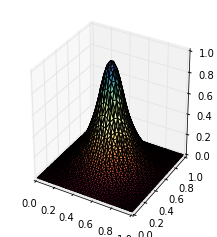

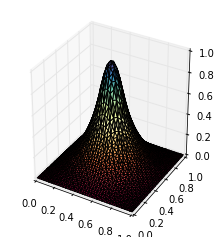

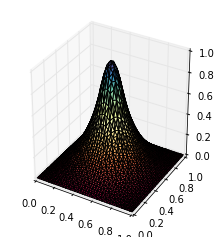

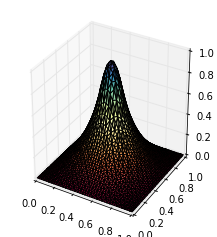

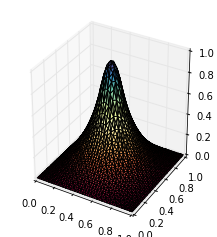

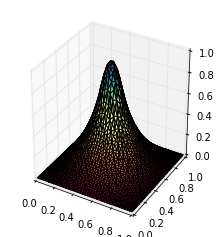

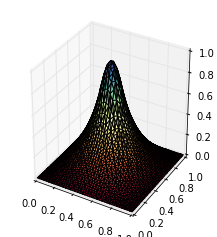

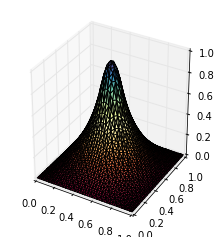

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as splinalg

# calcule la normale d'une famille de triangles triangle 3D, en déduit le gradient des fonctions dont 
# les triangles sont le graphe
def tri_gradient(A,B,C):
    N = np.cross(B - A, C-B)
    Gx = -N[:,0] / N[:,2]
    Gy = -N[:,1] / N[:,2]
    return Gx, Gy

# calcule les matrices Dx, Dy et A 
# NB: on utilise le package scipy.sparse pour un stockage "creux" des matrices,
# c'est-à-dire qu'on ne stocke que les entrées non nulles de la matrice.
def derivees_et_aires(X,T):
    nt = T.shape[0];
    npts = X.shape[0];
  
    A = X[T[:,0],:]; # liste des points A des triangles
    B = X[T[:,1],:]; # liste des points B des triangles
    C = X[T[:,2],:]; # liste des points C des triangles
  
    # calcul de dx et dy sur chaque triangle, en fonction de la valeur de
    # la fonction aux sommets du triangle
    Z = np.zeros((nt,1));
    I = np.ones((nt,1));
    [Gx1,Gy1] = tri_gradient(np.hstack((A,I)),np.hstack((B,Z)),np.hstack((C,Z)));
    [Gx2,Gy2] = tri_gradient(np.hstack((A,Z)),np.hstack((B,I)),np.hstack((C,Z)));
    [Gx3,Gy3] = tri_gradient(np.hstack((A,Z)),np.hstack((B,Z)),np.hstack((C,I)));
  
    # assemblage des matrices creuses
    # pour chaque triangle 1\leq t \leq nt, on a trois coefficients non nuls
    # en (t,a), (t,b), (t,c) où a = T[i,1], b=T[i,2], c=T[i,3]
    I = np.hstack((np.arange(nt), np.arange(nt), np.arange(nt)))
    J = np.hstack((T[:,0], T[:,1], T[:,2]))
    Sx = np.hstack((Gx1,Gx2,Gx3))
    Sy = np.hstack((Gy1,Gy2,Gy3))
    
    # les matrices creuses sont construites de la manière suivante:
    # pour tout l dans 0, ..., len(J)-1, on pose dx[I[k],J[k]] = Sx[k]
    dx = sp.csc_matrix((Sx,(I,J)),shape=(nt,npts))
    dy = sp.csc_matrix((Sy,(I,J)),shape=(nt,npts))
    
    # calcul de l'aire des triangles:
    AB = B-A
    BC = C-B
    aires = .5*(AB[:,0]*BC[:,1] - AB[:,1]*BC[:,0])
    return dx, dy, aires

# construction de la triangulation et des matrices Dx, Dy et vecteur A des aires
def triangulation_carre(n):
    x,y = np.meshgrid(np.linspace(0.,1.,n),
                      np.linspace(0.,1.,n))
    x = x.reshape(n*n,1)
    y = y.reshape(n*n,1)
    X = np.hstack((x,y))
    T = tri.Triangulation(x.flatten(), y.flatten()).triangles
    return X,T

X,T = triangulation_carre(40)
N = len(X)
[Dx,Dy,aires] = derivees_et_aires(X,T)

# assemblage de la matrice de rigidité
A = sp.diags(aires)
K = Dx.T*A*Dx + Dy.T*A*Dy

# conditions de Dirichlet
eps = 1e-5
Iint = (X[:,0] > eps) & (X[:,0] < 1.0-eps) & (X[:,1] > eps) & (X[:,1] < 1.0-eps)
Iint = np.where(Iint)[0]
Nint = len(Iint)
Aint = K[Iint, :][:,Iint]

#f = np.ones(len(Iint))
#vint = splinalg.spsolve(Aint, f)
#v = np.zeros(N)
#v[Iint] = vint
#plt.tripcolor(X[:,0],X[:,1],T,v,shading='gouraud')

#Psi = ((np.power(X[:,0]-.5,2.0) + np.power(X[:,1]-.5,2.0)) < .1).astype(float)
#Psiint = Psi[Iint]
Psi = np.exp(-30.0*(np.power(X[:,0]-.5,2.0) + np.power(X[:,1]-.5,2.0)))
Psi = Psi/np.amax(Psi)
Psiint = Psi[Iint]


from mpl_toolkits.mplot3d import Axes3D

tau = 1e-1
vint = np.zeros(Nint)
for i in xrange(1001):
    vint = vint - tau * (Aint*vint)
    vint = np.maximum(vint, Psiint)
    v = np.zeros(N) 
    v[Iint] = vint
    if i%100==0:
        #plt.tripcolor(X[:,0],X[:,1],T,v,shading='gouraud')
        fig = plt.figure(figsize=plt.figaspect(0.5))
        ax = fig.add_subplot(1, 2, 1, projection='3d',)
        ax.plot_trisurf(X[:,0],X[:,1],v,triangles=T, cmap=plt.cm.Spectral, shade=True)
        plt.show()